<a href="https://colab.research.google.com/github/pachterlab/GYP_2022/blob/dev/delay_cauchy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import tqdm
from tqdm import tqdm

In [2]:
p = [0.5,0.4,0.1]
k = 1.2
tau1 = 0.5
tau2 = 1
T = 2
nT = 100
t = np.linspace(0,T,nT)

In [3]:
nC = 10000
X = np.zeros((nT,nC))
for c_ in tqdm(range(nC)):
    generated_x1_num = np.random.poisson(T*k)
    arrival_times_x1 =  np.random.uniform(0,T,generated_x1_num)
    arrival_time_queue_1 = list(arrival_times_x1)
    arrival_time_storage_1 = np.asarray(arrival_time_queue_1.copy())
    # arrival_time_queue_2 = []
    # arrival_time_storage_2 = []

    deg_pathways_x1 = np.random.choice([1,2,3],size=generated_x1_num,p=p,replace=True)
    lifetimes = np.zeros(generated_x1_num)

    mf = deg_pathways_x1==1
    lifetimes[mf] = tau1

    mf = deg_pathways_x1==2
    lifetimes[mf] = tau2

    mf = deg_pathways_x1==3
    lifetimes[mf] = scipy.stats.halfcauchy.rvs(size=mf.sum())

    exit_time_storage_1 = arrival_time_storage_1 + lifetimes
    for tind,t_ in enumerate(t):
        extant_at_t_1 = (((exit_time_storage_1)>t_)&(arrival_time_storage_1<=t_)).sum()
        X[tind,c_] = extant_at_t_1


100%|██████████| 10000/10000 [00:23<00:00, 429.04it/s]


In [4]:
def meanspec(t):
    y = np.zeros_like(t)

    tf = t<tau1
    y_ = np.zeros_like(t)
    y_[tf] = t[tf]
    y_[~tf] = tau1
    y += p[0]*y_

    tf = t<tau2
    y_ = np.zeros_like(t)
    y_[tf] = t[tf]
    y_[~tf] = tau2
    y += p[1]*y_

    y += p[2] * 1/np.pi * (np.pi*t - 2*t*np.arctan(t) + np.log(1+t**2))

    y *= k
    return y

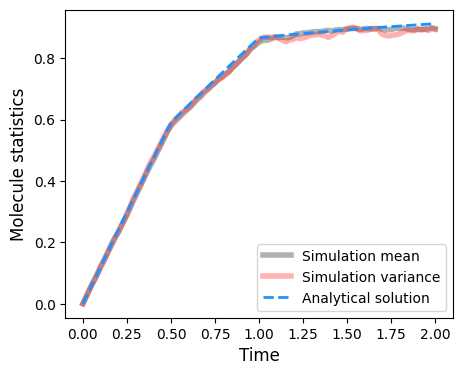

In [5]:
fs = 12
plt.figure(figsize=(5,4))
plt.plot(t,X.mean(1),color='k',label='Simulation mean',alpha=0.3,linewidth=4)
plt.plot(t,X.var(1),color='r',label='Simulation variance',alpha=0.3,linewidth=4)
# y =
# plt.plot(t,X.var(1),color='r')
y = meanspec(t)
plt.plot(t,y,'--',color='dodgerblue',label='Analytical solution',linewidth=2)
plt.legend()
plt.xlabel('Time',fontsize=fs)
plt.ylabel('Molecule statistics',fontsize=fs)
plt.savefig('cauchy.png',dpi=450)